### Pay Attention Path. Current Path should in mmdetection

In [1]:
!pwd

/root/data/mmdetection/projects/Ovdet


In [2]:
%cd ..

/root/data/mmdetection/projects


/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
%cd ..

/root/data/mmdetection


### Get weigths from 
https://drive.google.com/drive/folders/1b-ueEz57alju9qamADm7BmDCaL-NWnSn?usp=sharing

### Put it in the mmdetection

In [4]:
from mmdet.apis import init_detector, inference_detector

config_file = 'projects/Ovdet/configs/baron/ov_coco/baron_caption_faster_rcnn_r50_caffe_c4_90k.py'
checkpoint_file = 'iter_90000.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
res = inference_detector(model, 'demo/demo.jpg')

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


11/27 10:16:09 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "baron" registry tree. As a workaround, the current "baron" registry in "projects" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
Loads checkpoint by local backend from path: iter_90000.pth


In [5]:
res

<DetDataSample(

    META INFORMATION
    batch_input_shape: (800, 1216)
    img_path: 'demo/demo.jpg'
    img_shape: (800, 1199)
    ori_shape: (427, 640)
    pad_shape: (800, 1216)
    scale_factor: (1.8734375, 1.873536299765808)
    img_id: 0

    DATA FIELDS
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            labels: tensor([], dtype=torch.int64)
        ) at 0x7fe69160f3a0>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[2.1635e+02, 1.7802e+02, 4.6143e+02, 3.8643e+02],
                        [6.0843e+02, 1.1259e+02, 6.3563e+02, 1.3745e+02],
                        [3.9717e+02, 1.1167e+02, 4.3388e+02, 1.3338e+02],
                        [4.8141e+02, 1.1060e+02, 5.2257e+02, 1.2975e+02],
                        [1.9182e+02, 1.0878e+02, 2.9705e+02, 1.5492e+02],
                        [5.911

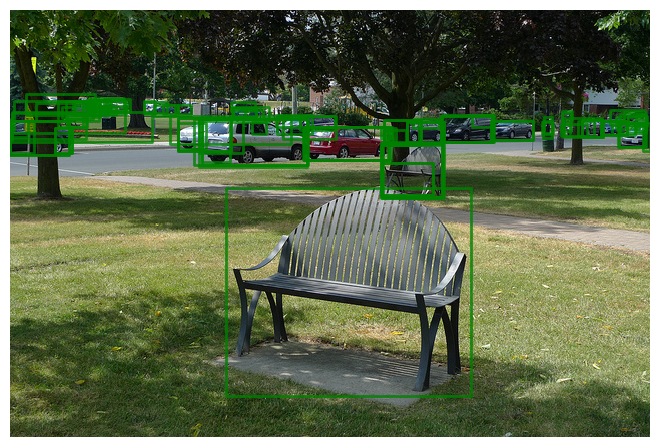

In [6]:
from mmengine.visualization import Visualizer
import torch
import mmcv

image = mmcv.imread('demo/demo.jpg',
                    channel_order='rgb')
visualizer = Visualizer(image=image)
# single bbox formatted as [xyxy]
visualizer.draw_bboxes(res.pred_instances.bboxes)
# draw multiple bboxes
# visualizer.draw_bboxes(torch.tensor([[33, 120, 209, 220], [72, 13, 179, 147]]))
visualizer.show()